# Gas Tubine

In [23]:
import keras 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.random.set_seed(14) 

In [3]:
gt = pd.read_csv(r"C:\Users\Administrator\Downloads\gas_turbines.csv")
gt.head() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df = gt.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


In [7]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [8]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [11]:
len(xtrain_scale)

10527

In [12]:
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)



Epoch 1/100


48/48 [==============================] - 7s 22ms/step - loss: 0.0705 - mse: 0.0705 - mae: 0.2025 - val_loss: 0.0461 - val_mse: 0.0461 - val_mae: 0.1582
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0446 - mse: 0.0446 - mae: 0.1532 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1548
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0437 - mse: 0.0437 - mae: 0.1549 - val_loss: 0.0436 - val_mse: 0.0436 - val_mae: 0.1563
Epoch 4/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0432 - mse: 0.0432 - mae: 0.1559 - val_loss: 0.0429 - val_mse: 0.0429 - val_mae: 0.1582
Epoch 5/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0427 - mse: 0.0427 - mae: 0.1581 - val_loss: 0.0423 - val_mse: 0.0423 - val_mae: 0.1586
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0423 - mse: 0.0423 - mae: 0.1593 - val_loss: 0.0441 - val_mse: 0.0441 - val_mae: 0.1617
Epoch 7/100
48/48

Epoch 46/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0400 - mse: 0.0400 - mae: 0.1596 - val_loss: 0.0416 - val_mse: 0.0416 - val_mae: 0.1626
Epoch 47/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0399 - mse: 0.0399 - mae: 0.1593 - val_loss: 0.0389 - val_mse: 0.0389 - val_mae: 0.1567
Epoch 48/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0392 - mse: 0.0392 - mae: 0.1576 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1555
Epoch 49/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1583 - val_loss: 0.0388 - val_mse: 0.0388 - val_mae: 0.1544
Epoch 50/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1561 - val_loss: 0.0384 - val_mse: 0.0384 - val_mae: 0.1548
Epoch 51/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1571 - val_loss: 0.0395 - val_mse: 0.0395 - val_mae: 0.1576
Epoch 52/100
48/

Epoch 96/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0383 - mse: 0.0383 - mae: 0.1536 - val_loss: 0.0391 - val_mse: 0.0391 - val_mae: 0.1563
Epoch 97/100
48/48 [==============================] - 0s 7ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1536 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1521
Epoch 98/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0385 - mse: 0.0385 - mae: 0.1547 - val_loss: 0.0379 - val_mse: 0.0379 - val_mae: 0.1533
Epoch 99/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1552 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1520
Epoch 100/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1556 - val_loss: 0.0378 - val_mse: 0.0378 - val_mae: 0.1523


In [13]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 1s 2ms/step


In [15]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [16]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038260,0.038260,0.153554,0.039147,0.039147,0.156287,95
96,0.038701,0.038701,0.153581,0.037762,0.037762,0.152138,96
97,0.038545,0.038545,0.154675,0.037939,0.037939,0.153272,97
98,0.038935,0.038935,0.155211,0.037735,0.037735,0.152047,98
99,0.038682,0.038682,0.155578,0.037794,0.037794,0.152342,99


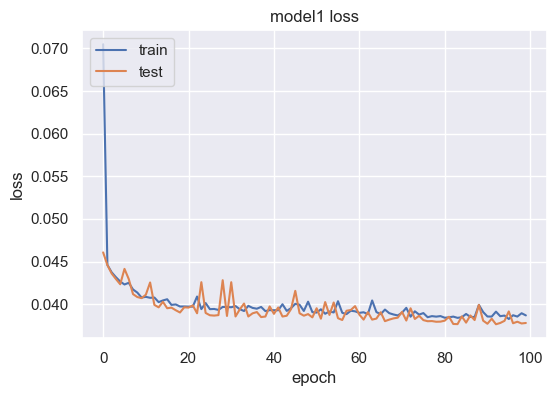

In [17]:
sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

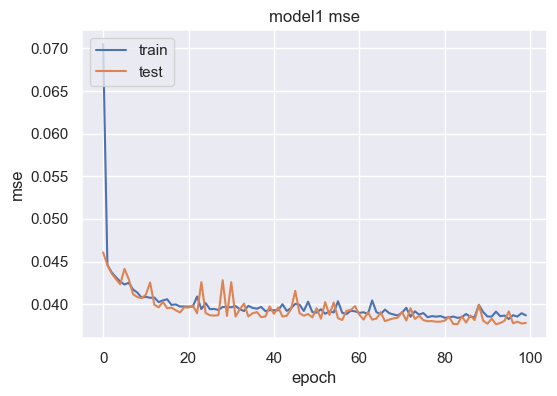

In [18]:
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# Forest Fires

In [25]:
ff = pd.read_csv(r'C:\Users\Administrator\Downloads\forestfires.csv')
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [26]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [27]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [28]:
ff.shape

(517, 31)

In [30]:
f1 = ff.iloc[:,0:11]
forest = pd.concat([f1,ff['size_category']],axis=1)
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


<Axes: xlabel='temp', ylabel='wind'>

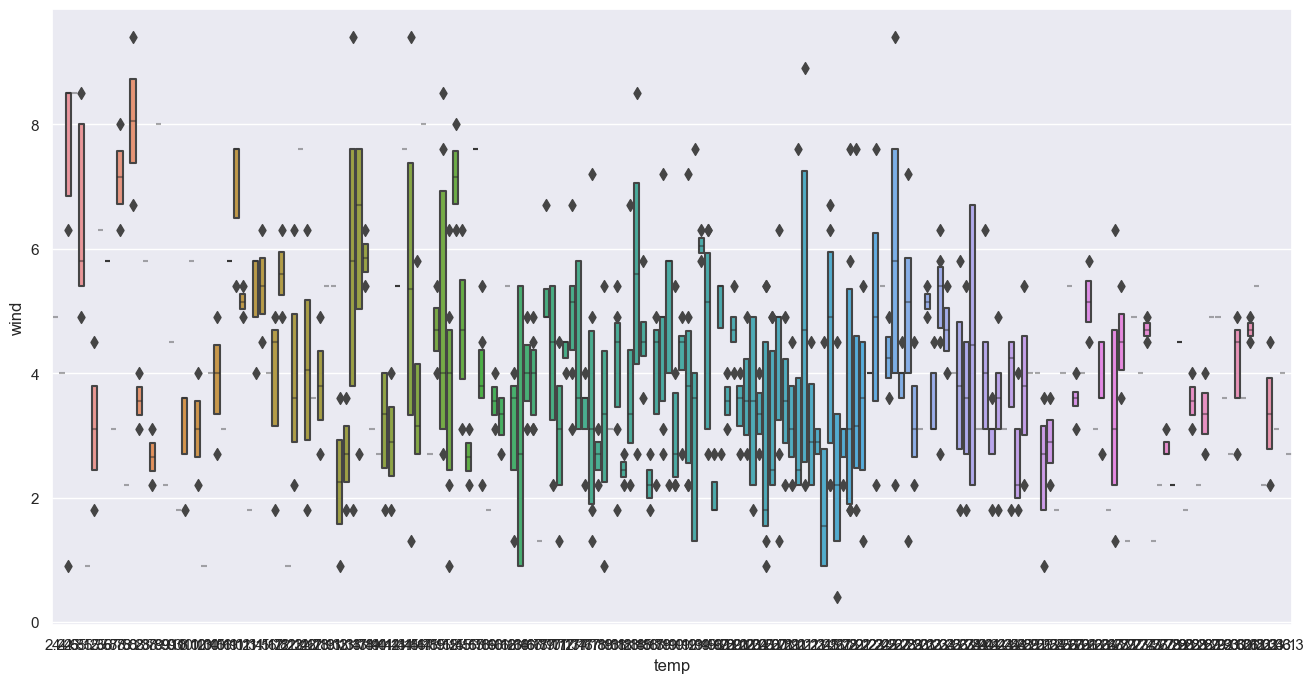

In [31]:
plt.figure(figsize = (16, 8));
sns.boxenplot(x = 'temp', y = 'wind', data = f1)

<Axes: xlabel='DMC', ylabel='DC'>

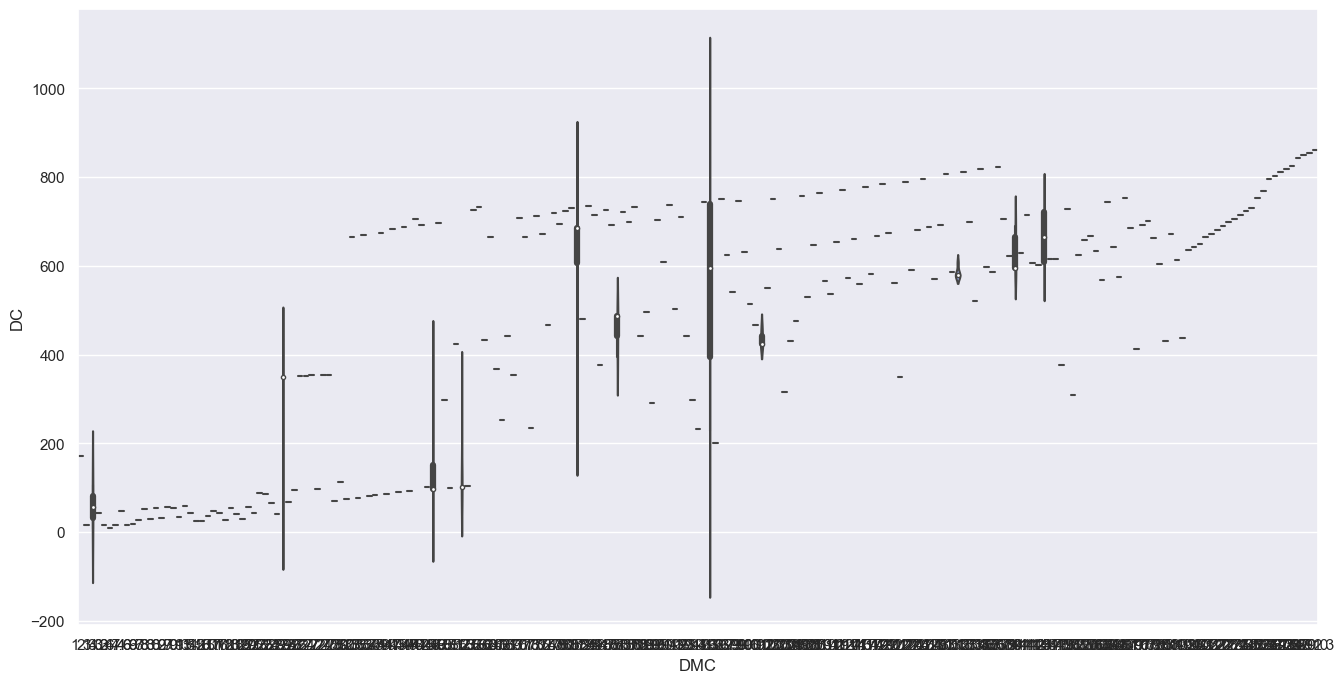

In [33]:
plt.figure(figsize = (16, 8));
sns.violinplot(x = 'DMC', y = 'DC', data = f1)

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
forest['month']= label_encoder.fit_transform(forest['month']) 
forest['day']= label_encoder.fit_transform(forest['day'])
forest['size_category']= label_encoder.fit_transform(forest['size_category'])

In [38]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [39]:
x=forest.iloc[:,0:11]
y=forest.iloc[:,-1]
x.head(7)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

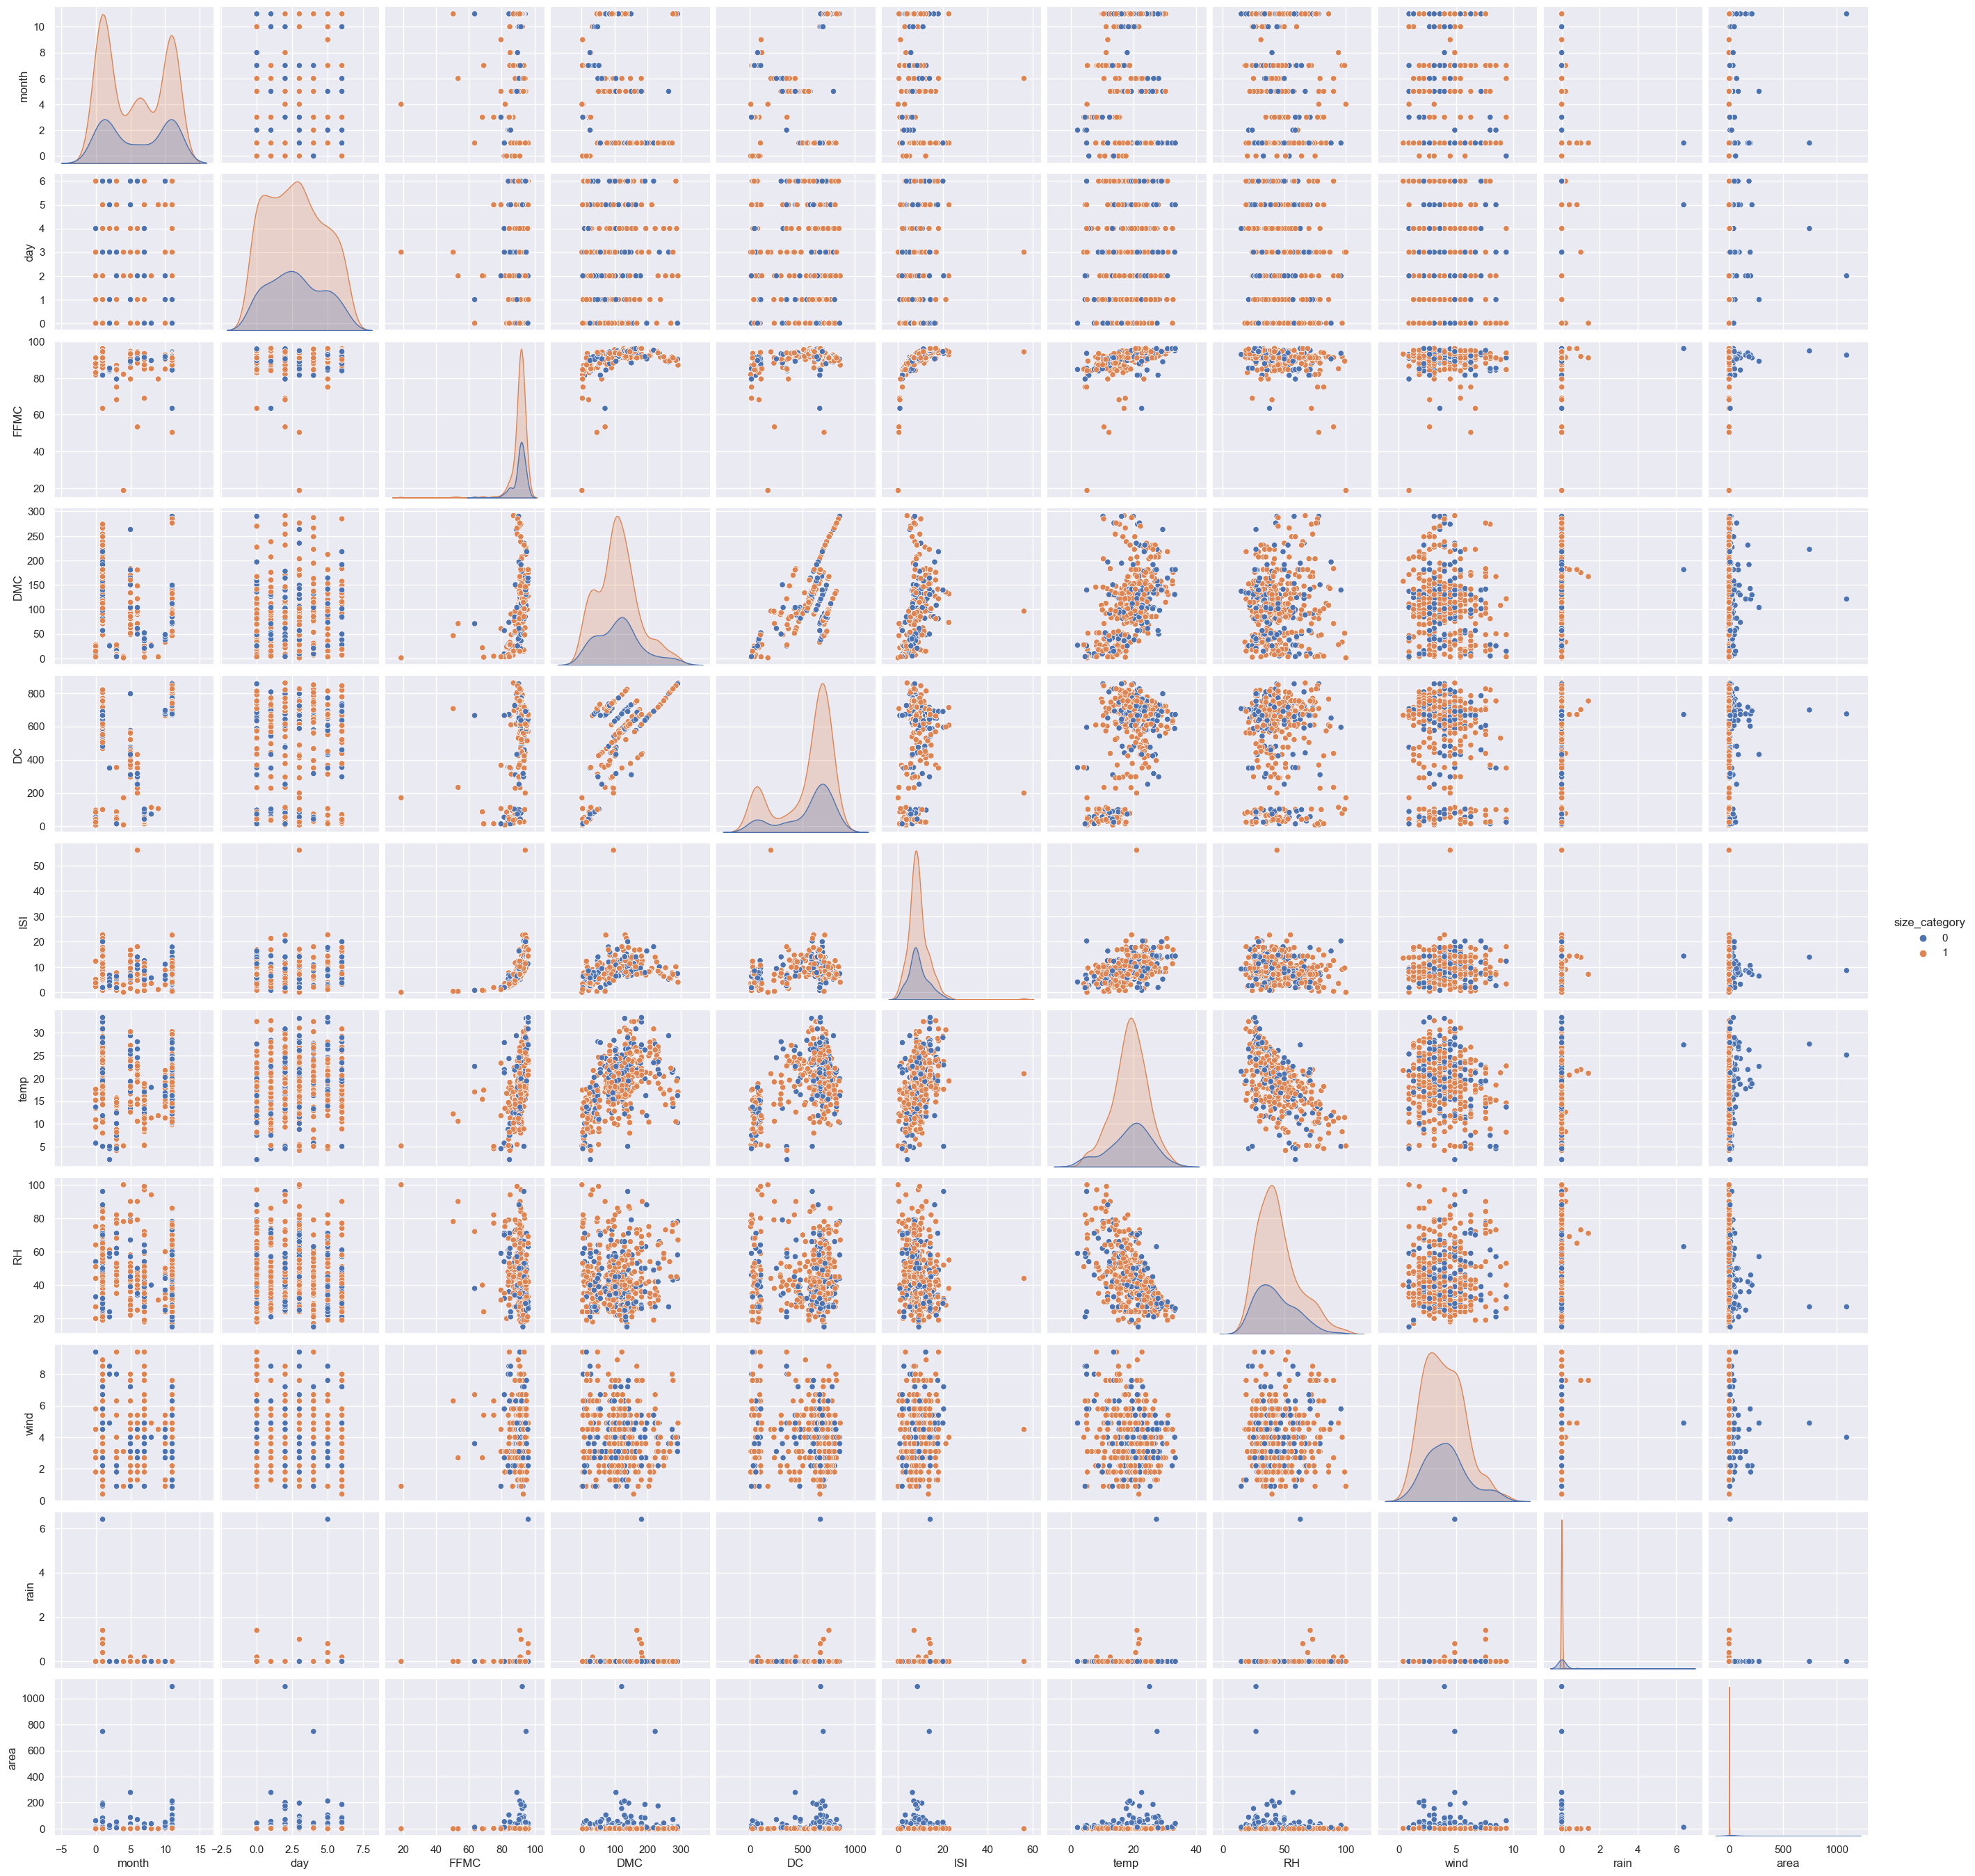

In [41]:
sns.pairplot(forest, hue='size_category')

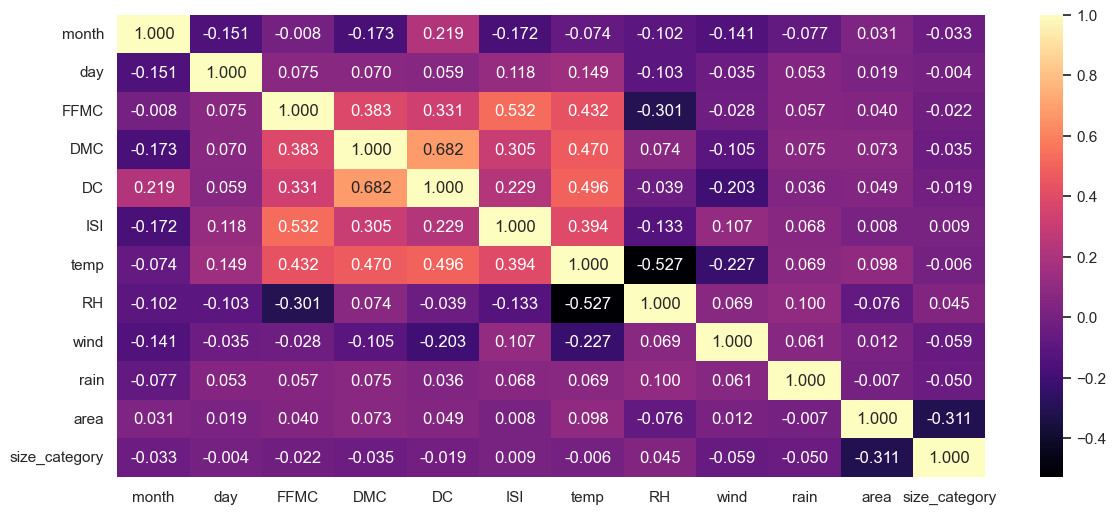

In [42]:
plt.figure(figsize = (14, 6));
sns.heatmap(forest.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()


In [43]:
np.random.seed(7)

X = forest.iloc[:,0:11]
Y = forest.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [51]:
model = Sequential()
model.add(Dense(14, input_dim=11,  activation='relu'))
model.add(Dense(11,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 3s 17ms/step - loss: 22.4467 - accuracy: 0.7428 - val_loss: 2.8075 - val_accuracy: 0.5380
Epoch 2/250
35/35 [==============================] - 0s 5ms/step - loss: 1.9841 - accuracy: 0.7168 - val_loss: 1.7727 - val_accuracy: 0.7602
Epoch 3/250
35/35 [==============================] - 0s 6ms/step - loss: 0.7355 - accuracy: 0.8121 - val_loss: 1.3127 - val_accuracy: 0.7836
Epoch 4/250
35/35 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.8179 - val_loss: 0.9997 - val_accuracy: 0.7836
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.8353 - val_loss: 1.7432 - val_accuracy: 0.7719
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: 0.4491 - accuracy: 0.8844 - val_loss: 0.7052 - val_accuracy: 0.8187
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8786 - val_loss: 0.6937 - val_accuracy: 0.8129
Epoch 8/250

Epoch 59/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9624 - val_loss: 0.1892 - val_accuracy: 0.9240
Epoch 60/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 0.2783 - val_accuracy: 0.8947
Epoch 61/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0569 - accuracy: 0.9769 - val_loss: 0.2887 - val_accuracy: 0.9006
Epoch 62/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9913 - val_loss: 0.1628 - val_accuracy: 0.9298
Epoch 63/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 0.9566 - val_loss: 0.1648 - val_accuracy: 0.9240
Epoch 64/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.9451 - val_loss: 0.0880 - val_accuracy: 0.9591
Epoch 65/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9884 - val_loss: 0.3011 - val_accuracy: 0.8947
Epoch 

35/35 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9827 - val_loss: 0.3430 - val_accuracy: 0.9181
Epoch 117/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1071 - accuracy: 0.9711 - val_loss: 0.0672 - val_accuracy: 0.9649
Epoch 118/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.9682 - val_loss: 0.4231 - val_accuracy: 0.9064
Epoch 119/250
35/35 [==============================] - 0s 6ms/step - loss: 0.1360 - accuracy: 0.9653 - val_loss: 0.3447 - val_accuracy: 0.9181
Epoch 120/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9827 - val_loss: 0.0778 - val_accuracy: 0.9766
Epoch 121/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.0902 - val_accuracy: 0.9766
Epoch 122/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0351 - accuracy: 0.9913 - val_loss: 0.0957 - val_accuracy: 0.9532
Epoch 123/250

35/35 [==============================] - 0s 5ms/step - loss: 0.0890 - accuracy: 0.9740 - val_loss: 0.0764 - val_accuracy: 0.9708
Epoch 174/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9827 - val_loss: 0.1985 - val_accuracy: 0.9415
Epoch 175/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.1403 - val_accuracy: 0.9474
Epoch 176/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 0.2588 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0215 - accuracy: 0.9913 - val_loss: 0.1087 - val_accuracy: 0.9532
Epoch 178/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9884 - val_loss: 0.0773 - val_accuracy: 0.9591
Epoch 179/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 0.0729 - val_accuracy: 0.9649
Epoch 180/250

35/35 [==============================] - 0s 8ms/step - loss: 0.1420 - accuracy: 0.9711 - val_loss: 1.1487 - val_accuracy: 0.8830
Epoch 231/250
35/35 [==============================] - 0s 5ms/step - loss: 0.2992 - accuracy: 0.9798 - val_loss: 0.1354 - val_accuracy: 0.9532
Epoch 232/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.3979 - val_accuracy: 0.9298
Epoch 233/250
35/35 [==============================] - 0s 5ms/step - loss: 0.1144 - accuracy: 0.9740 - val_loss: 0.1021 - val_accuracy: 0.9649
Epoch 234/250
35/35 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.9595 - val_loss: 0.1503 - val_accuracy: 0.9474
Epoch 235/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9971 - val_loss: 0.1699 - val_accuracy: 0.9474
Epoch 236/250
35/35 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9942 - val_loss: 0.1331 - val_accuracy: 0.9591
Epoch 237/250

In [54]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9865
accuracy: 98.65%


In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
scores

[0.04034417122602463, 0.9864603281021118]

In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

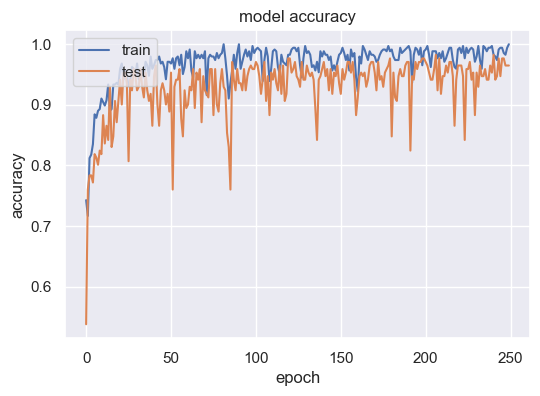

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

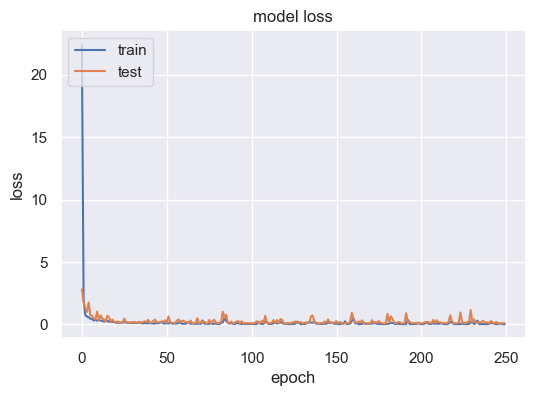

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [61]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [73]:
predictions = model.predict_classes(x_train)

AttributeError: 'Sequential' object has no attribute 'predict_classes'